In [215]:
import numpy as np
import pandas as pd

In [216]:
dataset = pd.read_csv("SMSSpamCollection", sep='\t' , names=['label','message'])

In [217]:
dataset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [218]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [219]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [220]:
dataset['label'] = dataset['label'].map({'ham':0,'spam':1})

In [221]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

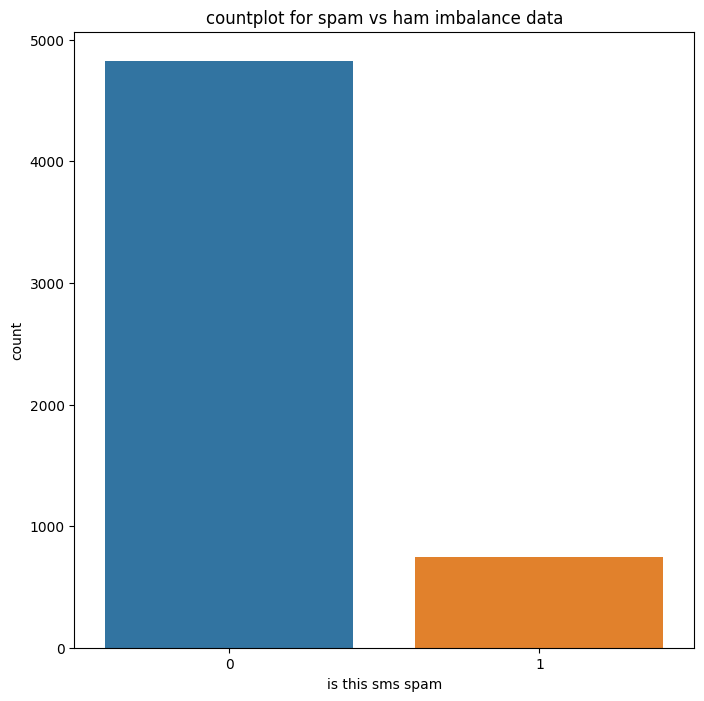

In [223]:
plt.figure(figsize=(8,8))
g = sns.countplot(x="label",data = dataset)
p = plt.title('countplot for spam vs ham imbalance data')
p = plt.xlabel('is this sms spam')
p = plt.ylabel('count')

In [224]:
only_spam = dataset[dataset["label"]==1]

In [225]:
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [226]:
print('No of SMS:' , len(dataset))
print('no. of ham SMS :', len(dataset)-len(only_spam))

No of SMS: 5572
no. of ham SMS : 4825


In [227]:
count = int ((dataset.shape[0] - only_spam.shape[0])/only_spam.shape[0])
count

6

In [228]:
for i in range (0,count-1):
  dataset = pd.concat([dataset,only_spam])

dataset.shape

(9307, 2)

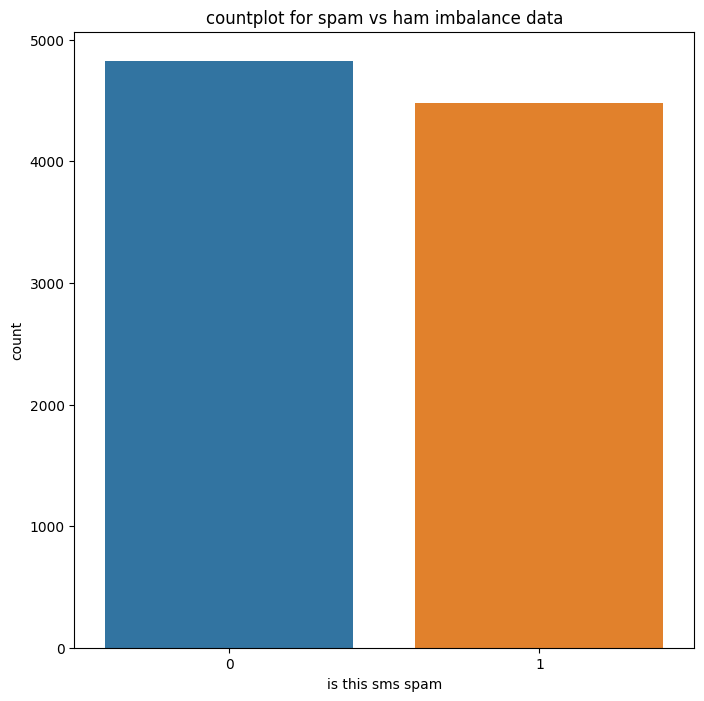

In [229]:
plt.figure(figsize=(8,8))
g = sns.countplot(x="label",data = dataset)
p = plt.title('countplot for spam vs ham imbalance data')
p = plt.xlabel('is this sms spam')
p = plt.ylabel('count')

In [230]:
dataset['word_count'] = dataset['message'].apply(lambda x: len(x.split()))

In [231]:
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


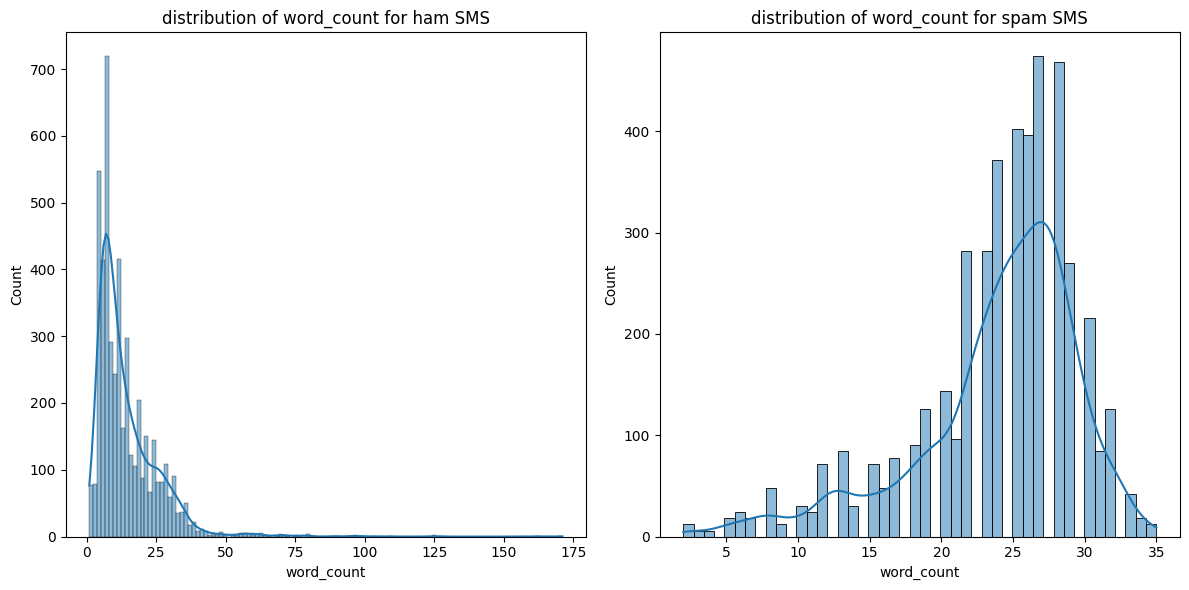

In [232]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset["label"]==0].word_count,kde = True)
p = plt.title('distribution of word_count for ham SMS')
plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset["label"]==1].word_count,kde = True)
p = plt.title('distribution of word_count for spam SMS')
plt.tight_layout()
plt.show()

In [233]:
def currency(data):
  currency_symbols = ['€','$','¥',' £','₹']
  for i in currency_symbols:
    if i in data:
      return 1
  return 0

In [234]:
dataset["contains_currency_symbols"]=dataset["message"].apply(currency)

In [235]:
dataset

,label,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


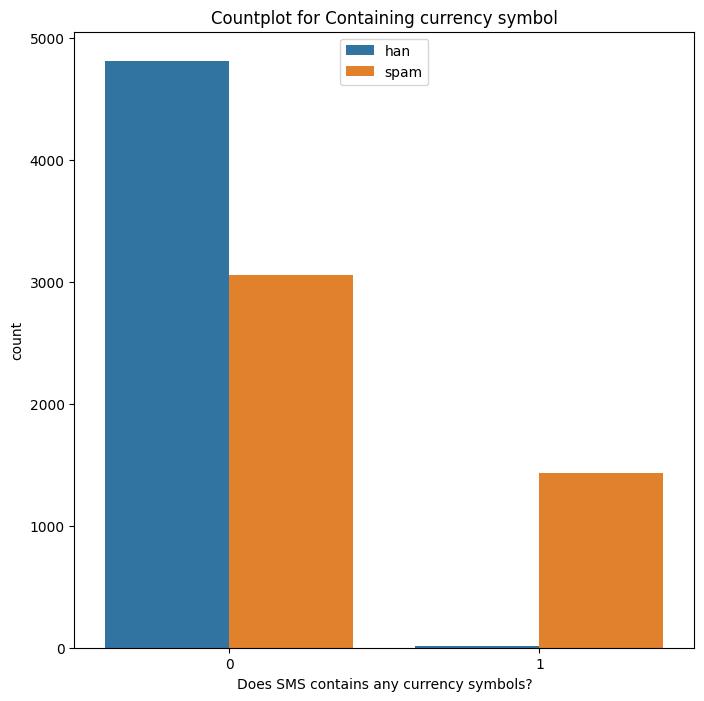

In [236]:
plt.figure(figsize=(8,8))
g = sns.countplot(x ='contains_currency_symbols',data = dataset, hue = "label")
p = plt.title('Countplot for Containing currency symbol')
p = plt.xlabel('Does SMS contains any currency symbols?')
p = plt.ylabel('count')
p = plt.legend(labels= ["han","spam"], loc = 9)

In [237]:
def number (data):
  for i in data:
    if ord(i)>= 48 and ord(i)<=57:
      return 1
  return 0

In [238]:
dataset["contains_number"] = dataset['message'].apply(number)

In [239]:
dataset

,label,message,word_count,contains_currency_symbols,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


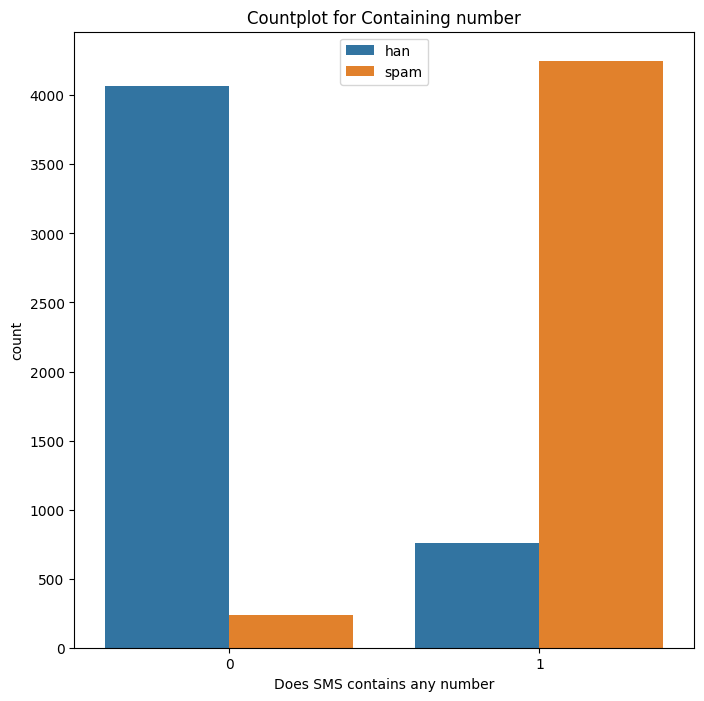

In [240]:
plt.figure(figsize=(8,8))
g = sns.countplot(x ='contains_number',data = dataset, hue = "label")
p = plt.title('Countplot for Containing number')
p = plt.xlabel('Does SMS contains any number')
p = plt.ylabel('count')
p = plt.legend(labels= ["han","spam"], loc = 9)

In [241]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [242]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(dataset.message):
  message = re.sub(pattern='[^a-zA-Z]',repl = ' ',string=sms)
  message = message.lower()
  word = message.split()
  filtered_word = [word for word in word if word not in set(stopwords.words('english'))]
  lemn_words = [wnl.lemmatize(word) for word in word]
  message = ' '.join(lemn_words)
  corpus.append(message)

In [243]:
corpus

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s',
 'u dun say so early hor u c already then say',
 'nah i don t think he go to usf he life around here though',
 'freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother is not like to speak with me they treat me like aid patent',
 'a per your request melle melle oru minnaminunginte nurungu vettam ha been set a your callertune for all caller press to copy your friend callertune',
 'winner a a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hour only',
 'had your mobile month or more u r entitled to update to the latest colour mobile with camera for free call the mobile up

In [244]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [245]:
x = pd.DataFrame(vectors , columns = feature_names)
y = dataset['label']

In [246]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report , confusion_matrix

In [247]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [248]:
x_test.head

<bound method NDFrame.head of       about   ac  account  admirer  after  again  age       all  already  \
1155    0.0  0.0      0.0      0.0    0.0    0.0  0.0  0.375506      0.0   
1790    0.0  0.0      0.0      0.0    0.0    0.0  0.0  0.000000      0.0   
3003    0.0  0.0      0.0      0.0    0.0    0.0  0.0  0.000000      0.0   
6489    0.0  0.0      0.0      0.0    0.0    0.0  0.0  0.000000      0.0   
592     0.0  0.0      0.0      0.0    0.0    0.0  0.0  0.000000      0.0   
...     ...  ...      ...      ...    ...    ...  ...       ...      ...   
4147    0.0  0.0      0.0      0.0    0.0    0.0  0.0  0.000000      0.0   
274     0.0  0.0      0.0      0.0    0.0    0.0  0.0  0.000000      0.0   
1345    0.0  0.0      0.0      0.0    0.0    0.0  0.0  0.000000      0.0   
8891    0.0  0.0      0.0      0.0    0.0    0.0  0.0  0.000000      0.0   
4031    0.0  0.0      0.0      0.0    0.0    0.0  0.0  0.000000      0.0   

      also  ...   ya      yeah  year  yes  yet   yo      

In [249]:
from sklearn.naive_bayes import MultinomialNB
nvb = MultinomialNB()
cv = cross_val_score(nvb , x, y , scoring ='f1',cv =10)
print (round(cv.mean(), 3))
print (round(cv.std(),3))

0.948
0.007


In [250]:
nvb.fit(x_train,y_train)
y_pred = nvb.predict(x_test)

In [251]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       959
           1       0.96      0.94      0.95       903

    accuracy                           0.95      1862
   macro avg       0.95      0.95      0.95      1862
weighted avg       0.95      0.95      0.95      1862



In [252]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[926,  33],
       [ 57, 846]])

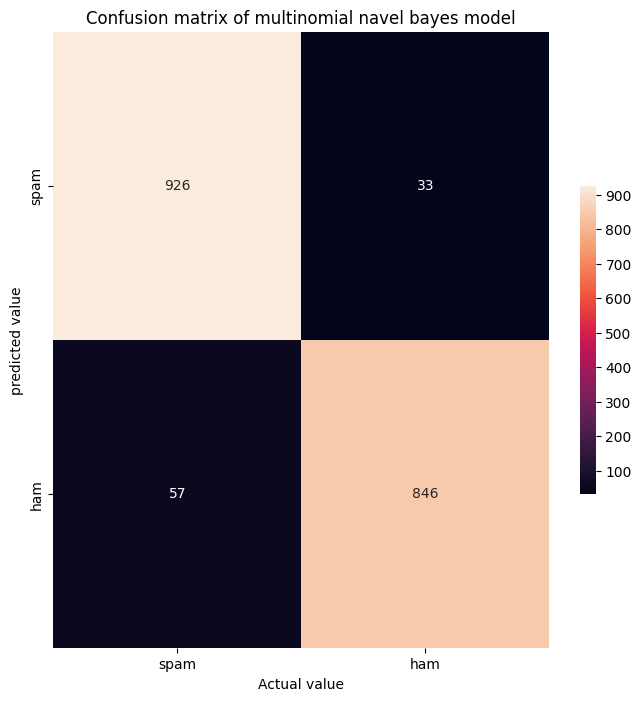

In [253]:
plt.figure(figsize = (8,8))
axis_labels = {'ham','spam'}
g=sns.heatmap(data=cm, xticklabels = axis_labels, yticklabels = axis_labels,annot =True, fmt ='g',cbar_kws={"shrink":0.5})
p = plt.title('Confusion matrix of multinomial navel bayes model')
p = plt.xlabel('Actual value')
p = plt.ylabel('predicted value')

In [254]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt , x ,y,scoring = 'f1',cv =10)
print (round(cv1.mean(), 3))
print (round(cv1.std(),3))

0.983
0.003


In [255]:
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [256]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       959
           1       0.97      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [257]:
cm1 = confusion_matrix(y_test,y_pred)
cm1

array([[927,  32],
       [  4, 899]])

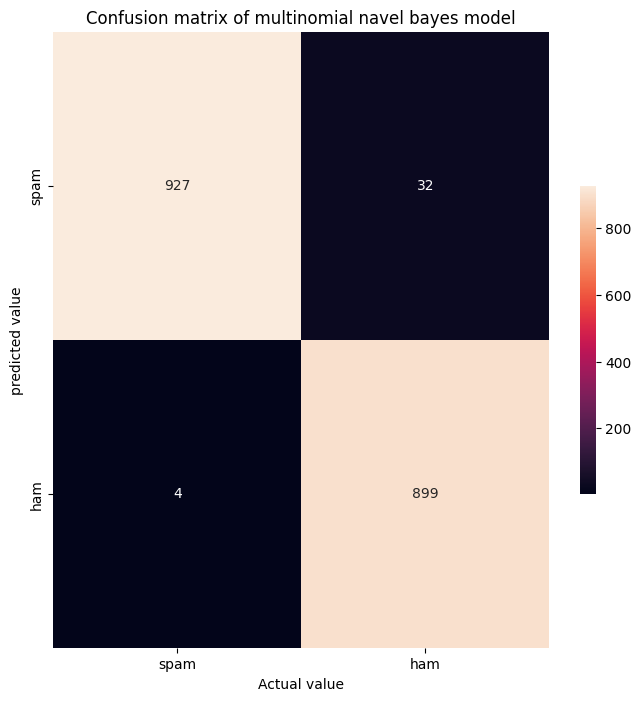

In [258]:
plt.figure(figsize = (8,8))
axis_labels = {'ham','spam'}
g=sns.heatmap(data=cm1, xticklabels = axis_labels, yticklabels = axis_labels,annot =True, fmt ='g',cbar_kws={"shrink":0.5})
p = plt.title('Confusion matrix of multinomial navel bayes model')
p = plt.xlabel('Actual value')
p = plt.ylabel('predicted value')

In [259]:
def predict_spam(sms):
  message = re.sub(pattern='[^a-zA-Z]',repl = ' ',string=sms)
  message = message.lower()
  word = message.split()
  filtered_word = [word for word in word if word not in set(stopwords.words('english'))]
  lemn_words = [wnl.lemmatize(word) for word in word]
  message = ' '.join(lemn_words)
  temp = tfidf.transform([message]).toarray()
  return dt.predict(temp)

In [260]:
sample_message = 'this is an important message to inform evry one that this is the last hospi  meet'
if predict_spam(sample_message):
  print('this message is spam')
else:
  print('this message is ham')#prediction done is right i have used some other ham message example in this

this message is ham


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
